In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255

In [7]:
#인코딩
autoencoder = Sequential()
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [8]:
#디코딩
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 80s 168ms/step - loss: 0.2005 - val_loss: 0.1334
Epoch 2/50
469/469 [==============================] - 81s 173ms/step - loss: 0.1239 - val_loss: 0.1159
Epoch 3/50
469/469 [==============================] - 86s 183ms/step - loss: 0.1126 - val_loss: 0.1081
Epoch 4/50
469/469 [==============================] - 92s 196ms/step - loss: 0.1074 - val_loss: 0.1043
Epoch 5/50
469/469 [==============================] - 96s 204ms/step - loss: 0.1038 - val_loss: 0.1011
Epoch 6/50
469/469 [==============================] - 97s 207ms/step - loss: 0.1011 - val_loss: 0.0987
Epoch 7/50
469/469 [==============================] - 93s 199ms/step - loss: 0.0991 - val_loss: 0.0970
Epoch 8/50
469/469 [==============================] - 93s 199ms/step - loss: 0.0974 - val_loss: 0.0955
Epoch 9/50
469/469 [==============================] - 93s 199ms/step - loss: 0.0961 - val_loss: 0.0942
Epoch 10/50
469/469 [==============================] - 94s 200ms/step - l

In [13]:
random_test = np.random.randint(X_test.shape[0], size=5)

In [14]:
ae_imgs=autoencoder.predict(X_test)

313/313 [==============================] - 6s 18ms/step


In [15]:
plt.figure(figsize=(7,2))

<Figure size 504x144 with 0 Axes>

<Figure size 504x144 with 0 Axes>

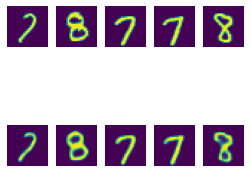

In [16]:
for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2,7,i+1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2,7,7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')
plt.show()